<a href="https://colab.research.google.com/github/Notfamousyet/DataScience-Class-notes/blob/main/class15th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
df=pd.read_csv('/content/longley.csv')

In [ ]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [ ]:
df1=df.drop('Employed',axis=1)

In [ ]:
df1.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
0,83.0,234.289,235.6,159.0,107.608,1947
1,88.5,259.426,232.5,145.6,108.632,1948
2,88.2,258.054,368.2,161.6,109.773,1949
3,89.5,284.599,335.1,165.0,110.929,1950
4,96.2,328.975,209.9,309.9,112.075,1951


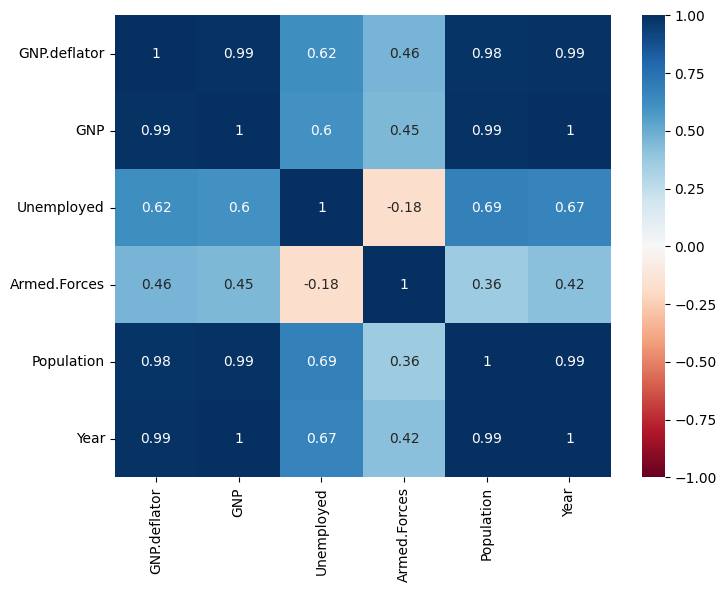

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu')
plt.show()

In [ ]:
x=df1

In [ ]:
y=df['Employed']

In [ ]:
y.head()

0    60.323
1    61.122
2    60.171
3    61.187
4    63.221
Name: Employed, dtype: float64

In [ ]:
x.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
0,83.0,234.289,235.6,159.0,107.608,1947
1,88.5,259.426,232.5,145.6,108.632,1948
2,88.2,258.054,368.2,161.6,109.773,1949
3,89.5,284.599,335.1,165.0,110.929,1950
4,96.2,328.975,209.9,309.9,112.075,1951


In [ ]:
import statsmodels.api as sm

In [ ]:
x=sm.add_constant(x)

In [ ]:
x

,const,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
0,1.0,83.0,234.289,235.6,159.0,107.608,1947
1,1.0,88.5,259.426,232.5,145.6,108.632,1948
2,1.0,88.2,258.054,368.2,161.6,109.773,1949
3,1.0,89.5,284.599,335.1,165.0,110.929,1950
4,1.0,96.2,328.975,209.9,309.9,112.075,1951
5,1.0,98.1,346.999,193.2,359.4,113.270,1952
6,1.0,99.0,365.385,187.0,354.7,115.094,1953
7,1.0,100.0,363.112,357.8,335.0,116.219,1954
8,1.0,101.2,397.469,290.4,304.8,117.388,1955
9,1.0,104.6,419.180,282.2,285.7,118.734,1956


In [ ]:
model=sm.OLS(x,y).fit()

In [ ]:
model

In [ ]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x79f3e23f2020>>

In [ ]:
df1.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
0,83.0,234.289,235.6,159.0,107.608,1947
1,88.5,259.426,232.5,145.6,108.632,1948
2,88.2,258.054,368.2,161.6,109.773,1949
3,89.5,284.599,335.1,165.0,110.929,1950
4,96.2,328.975,209.9,309.9,112.075,1951


In [ ]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [ ]:
from statsmodels.multivariate.factor import Factor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
model1.score(x_train,y_train)

0.9960806076421849

In [ ]:
model1.score(x_test,y_test)

0.9910472990227892

In [ ]:
model2=Factor(df1).fit()

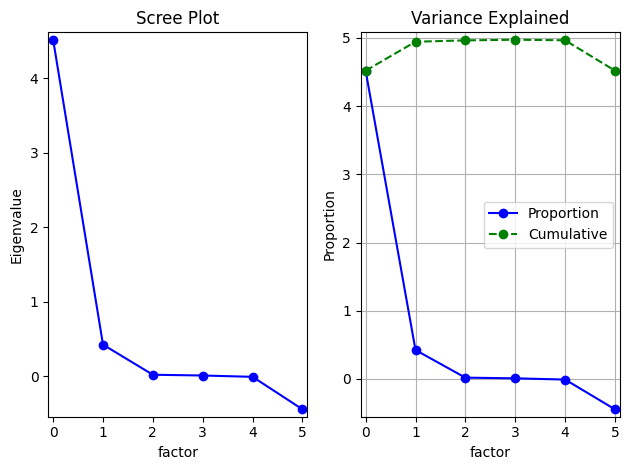

In [ ]:
model2.plot_scree()
plt.grid()
plt.show()

In [ ]:
from statsmodels.multivariate.pca import PCA

In [ ]:
pc=PCA(df1,ncomp=2,standardize=True,normalize=True,missing=None,method='eig')

In [ ]:
pc

Principal Component Analysis(nobs: 16, nvar: 6, transformation: Standardize (Correlation), normalization: True, number of components: 2, method: Eigenvalue, id: 0x79f3e180fd00)

In [ ]:
pc.loadings

,comp_0,comp_1
GNP.deflator,-0.461835,0.057843
GNP,-0.461504,0.053212
Unemployed,-0.321317,-0.595514
Armed.Forces,-0.201510,0.798193
Population,-0.462279,-0.045544
Year,-0.464940,0.000619


In [ ]:
df_comp=pc.loadings.T

In [ ]:
df_comp

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
comp_0,-0.461835,-0.461504,-0.321317,-0.201510,-0.462279,-0.464940
comp_1,0.057843,0.053212,-0.595514,0.798193,-0.045544,0.000619


In [ ]:
pc.factors

,comp_0,comp_1
0,0.418651,-0.178971
1,0.362290,-0.202209
2,0.281997,-0.366769
3,0.251984,-0.303971
4,0.173080,0.294319
5,0.121576,0.457772
6,0.084531,0.455024
7,-0.003910,0.141241
8,-0.011975,0.165164
9,-0.054085,0.130476


In [ ]:
y_factors=pc.factors

In [ ]:
y_factors

,comp_0,comp_1
0,0.418651,-0.178971
1,0.362290,-0.202209
2,0.281997,-0.366769
3,0.251984,-0.303971
4,0.173080,0.294319
5,0.121576,0.457772
6,0.084531,0.455024
7,-0.003910,0.141241
8,-0.011975,0.165164
9,-0.054085,0.130476


In [ ]:
y_factors.columns=['col1','col2']

In [ ]:
print(y_factors)

        col1      col2
0   0.418651 -0.178971
1   0.362290 -0.202209
2   0.281997 -0.366769
3   0.251984 -0.303971
4   0.173080  0.294319
5   0.121576  0.457772
6   0.084531  0.455024
7  -0.003910  0.141241
8  -0.011975  0.165164
9  -0.054085  0.130476
10 -0.114934  0.102278
11 -0.218673 -0.205575
12 -0.233462 -0.092066
13 -0.284141 -0.118868
14 -0.370414 -0.235770
15 -0.402514 -0.042076


In [ ]:
y_factors.corr()

,col1,col2
col1,1.000000e+00,-3.469447e-17
col2,-3.469447e-17,1.000000e+00


<Axes: >

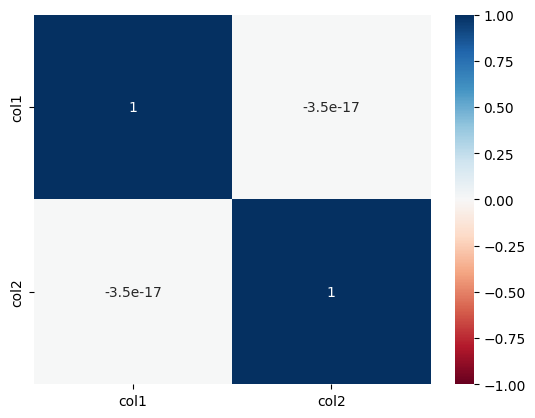

In [ ]:
sns.heatmap(y_factors.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)

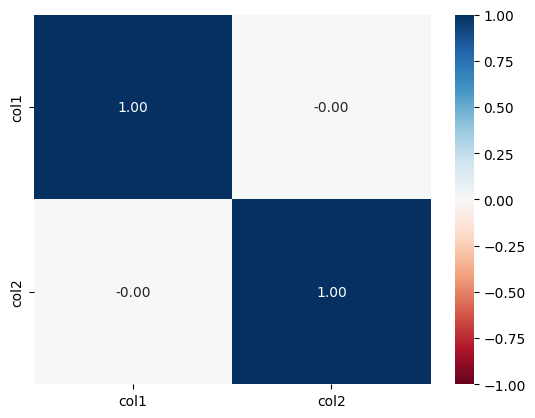

In [ ]:
sns.heatmap(y_factors.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1,fmt='.2f')
plt.show()

In [ ]:
x_pca=sm.add_constant(y_factors)

In [ ]:
x_pca

,const,col1,col2
0,1.0,0.418651,-0.178971
1,1.0,0.362290,-0.202209
2,1.0,0.281997,-0.366769
3,1.0,0.251984,-0.303971
4,1.0,0.173080,0.294319
5,1.0,0.121576,0.457772
6,1.0,0.084531,0.455024
7,1.0,-0.003910,0.141241
8,1.0,-0.011975,0.165164
9,1.0,-0.054085,0.130476


In [ ]:
x_pca.head()

,const,col1,col2
0,1.0,0.418651,-0.178971
1,1.0,0.362290,-0.202209
2,1.0,0.281997,-0.366769
3,1.0,0.251984,-0.303971
4,1.0,0.173080,0.294319


In [ ]:
y

0     60.323
1     61.122
2     60.171
3     61.187
4     63.221
5     63.639
6     64.989
7     63.761
8     66.019
9     67.857
10    68.169
11    66.513
12    68.655
13    69.564
14    69.331
15    70.551
Name: Employed, dtype: float64

In [ ]:
model3=sm.OLS(y,x_pca).fit()

In [ ]:
model3.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     84.90
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           3.45e-08
Time:                        04:59:04   Log-Likelihood:                -21.138
No. Observations:                  16   AIC:                             48.28
Df Residuals:                      13   BIC:                             50.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3170      0.252    259.703      0.000      64.774      65.860
col1         -13.0056      1.006    -12.928      0.000     -15.179     -10.832
col2           1.6452      1.006      1.635      0.126      -0.528       3.819
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.371
Skew:                          -0.201   Prob(JB):                        0.831
Kurtosis:                       2.371   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_pca.iloc[:,1:],y,test_size=0.33,random_state=42)

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
linear_model.score(x_train,y_train)

0.9303632796204887

In [ ]:
linear_model.score(x_test,y_test)

0.8870298398853599

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_pca.iloc[:,1:2],y,test_size=0.33,random_state=42)

In [ ]:
linearmodel=LinearRegression()

In [ ]:
linearmodel.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(linearmodel.score(x_train,y_train))

0.9055486619703021


In [ ]:
print(linearmodel.score(x_test,y_test))

0.8689101520989752


In [ ]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58646 sha256=266203194c8d78d16ec87eefea73965c39b2e29b60b285e7c765d437a8cec387
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
from bioinfokit.visuz import cluster

In [ ]:
df=pd.read_csv('/content/breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.corr().T

<ipython-input-71-50be2e233ef7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<ipython-input-74-9fbf79b5fe1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='PuOr')


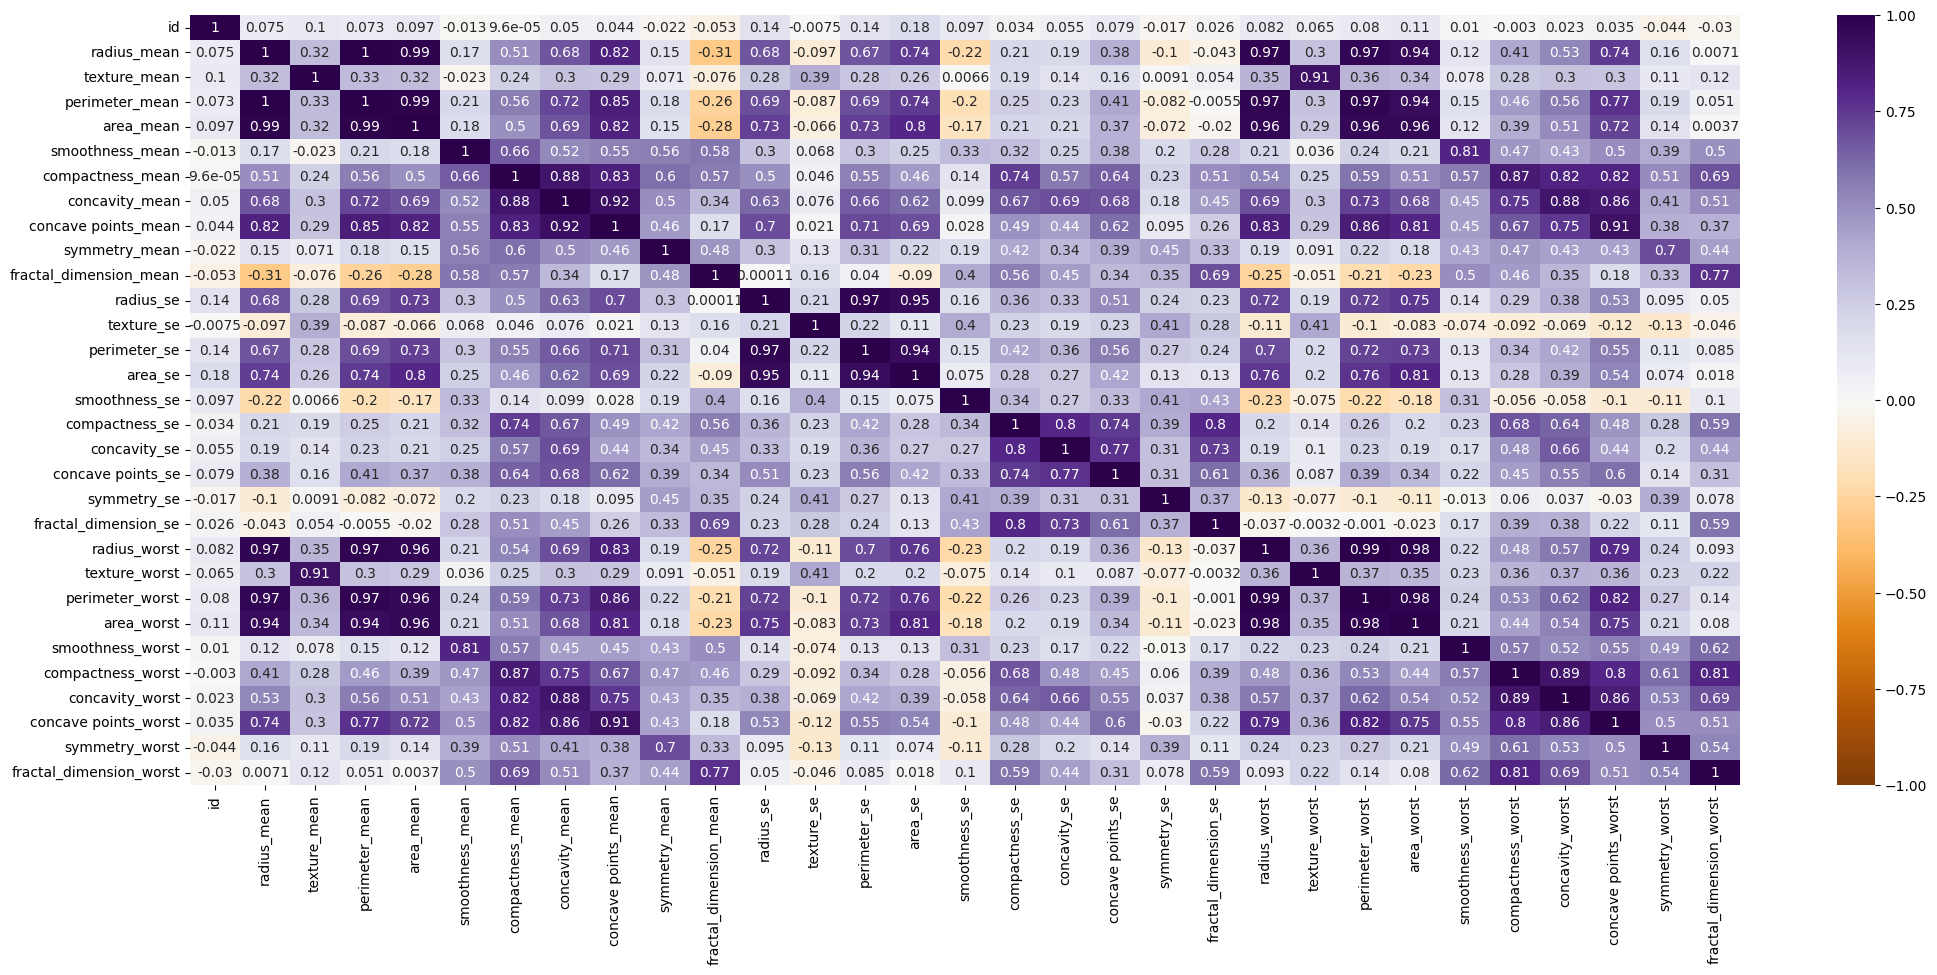

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='PuOr')
plt.show()

In [ ]:
array=df.values

In [ ]:
x=array[:,2:]

In [ ]:
y=array[:,1]

In [ ]:
x

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [ ]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
model4=TSNE(2)

In [ ]:
model4.fit(x)

TSNE()

In [ ]:
data_tsne=TSNE(n_components=2).fit_transform(x)

In [ ]:
cluster.tsneplot(score=data_tsne)

In [ ]:
color_class=df['diagnosis'].to_numpy()

In [ ]:
color_class

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
cluster.tsneplot(score=data_tsne,colorlist=color_class,legendpos='upper right')

In [ ]:
data_tsne

array([[ 42.90231  , -12.763205 ],
       [ 43.1742   , -10.058307 ],
       [ 38.53075  ,  -9.981981 ],
       ...,
       [ 22.986378 ,  -2.4715464],
       [ 41.025917 , -10.069568 ],
       [-39.380596 , -25.049753 ]], dtype=float32)

In [ ]:
df['x']=data_tsne[:,0]

In [ ]:
df['y']=data_tsne[:,1]

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,x,y
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,42.902309,-12.763205
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,43.174198,-10.058307
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,38.530750,-9.981981
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,-17.533581,1.486053
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,37.425365,-7.845129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,44.726635,-9.477748
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,39.483688,-9.381176
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,22.986378,-2.471546
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,41.025917,-10.069568


<Axes: xlabel='x', ylabel='y'>

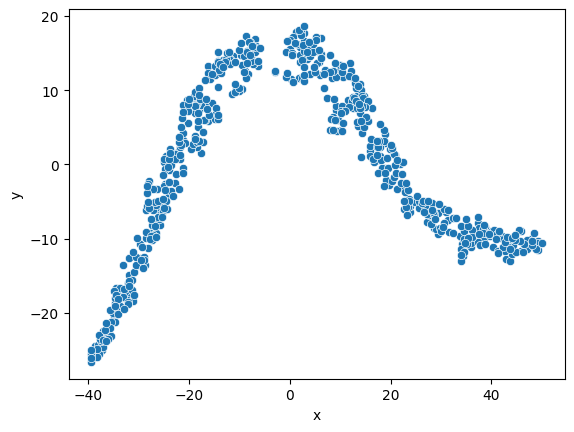

In [ ]:
sns.scatterplot(x='x',y='y',data=df)

In [ ]:
plt.show()

<Axes: xlabel='x', ylabel='y'>

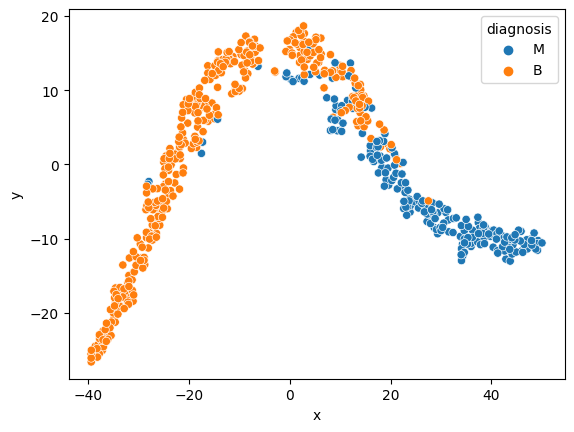

In [ ]:
sns.scatterplot(x='x',y='y',hue='diagnosis',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: xlabel='x', ylabel='y'>

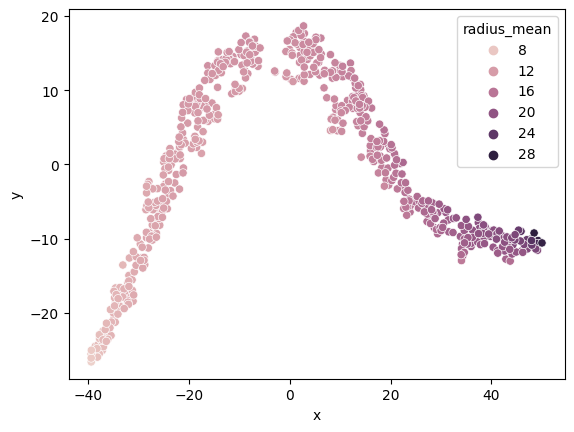

In [ ]:
sns.scatterplot(x='x',y='y',hue='radius_mean',data=df)

In [ ]:
sns.scatterplot(x='x',y='y',hue='texture_mea')